In [22]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv(r'C:\Users\sahithi aharam\Downloads\iris\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [26]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [27]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
# Checking duplicated values
df.duplicated().sum()

3

In [29]:
# Removing duplicated values
df.drop_duplicates(inplace=True)
# Again checking duplicated values
df.duplicated().sum()

0

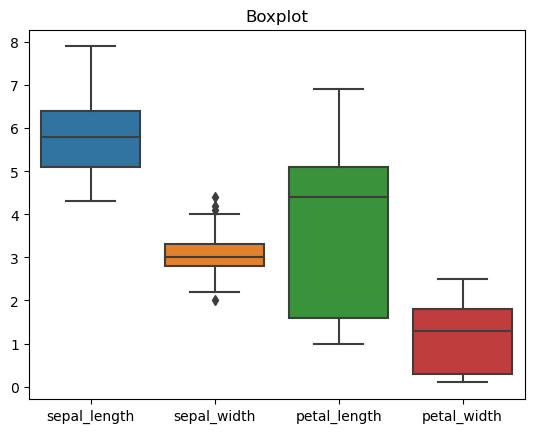

In [30]:
sn.boxplot(data=df)
plt.title("Boxplot")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


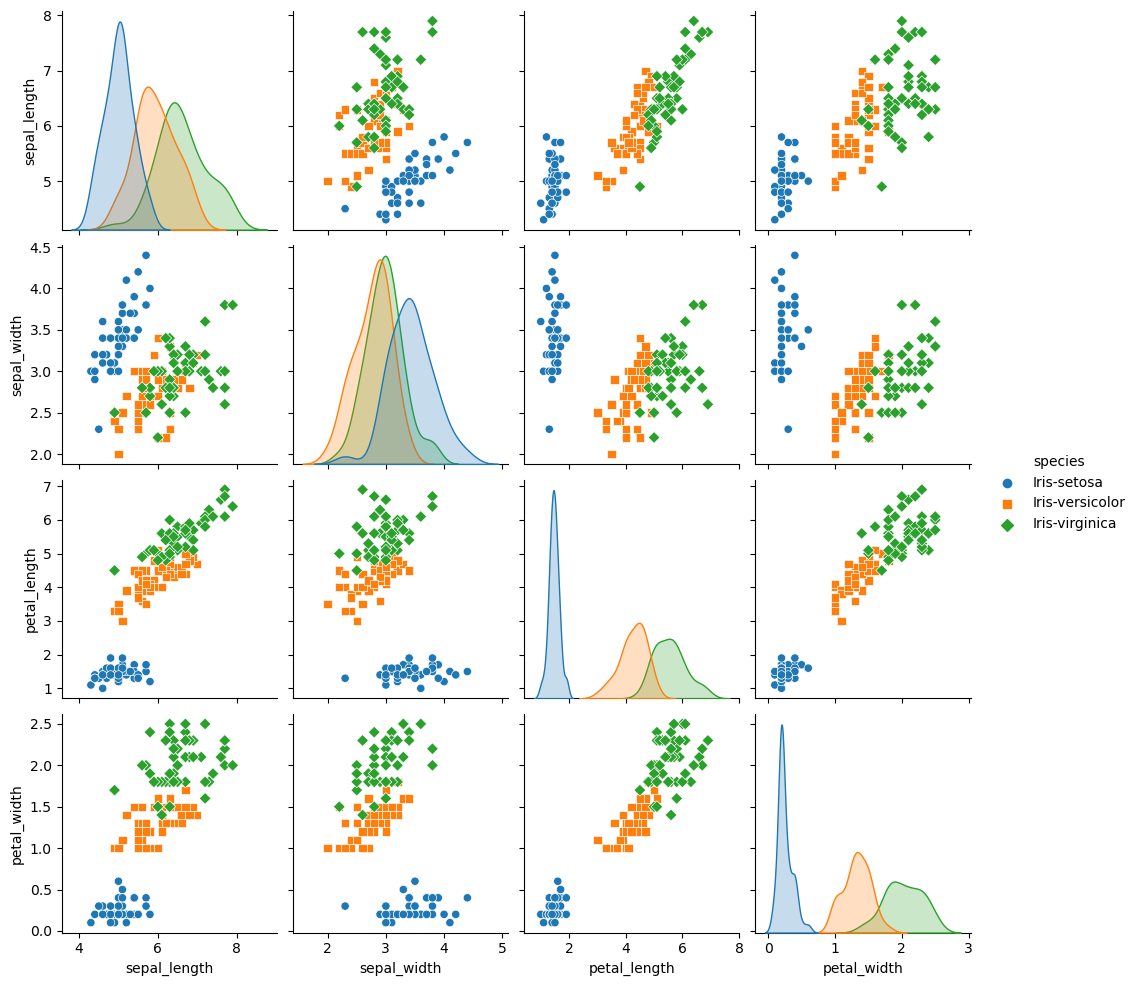

In [31]:
# Pairplot to visualize relationships between variables
sn.pairplot(df, hue="species", markers=["o", "s", "D"])

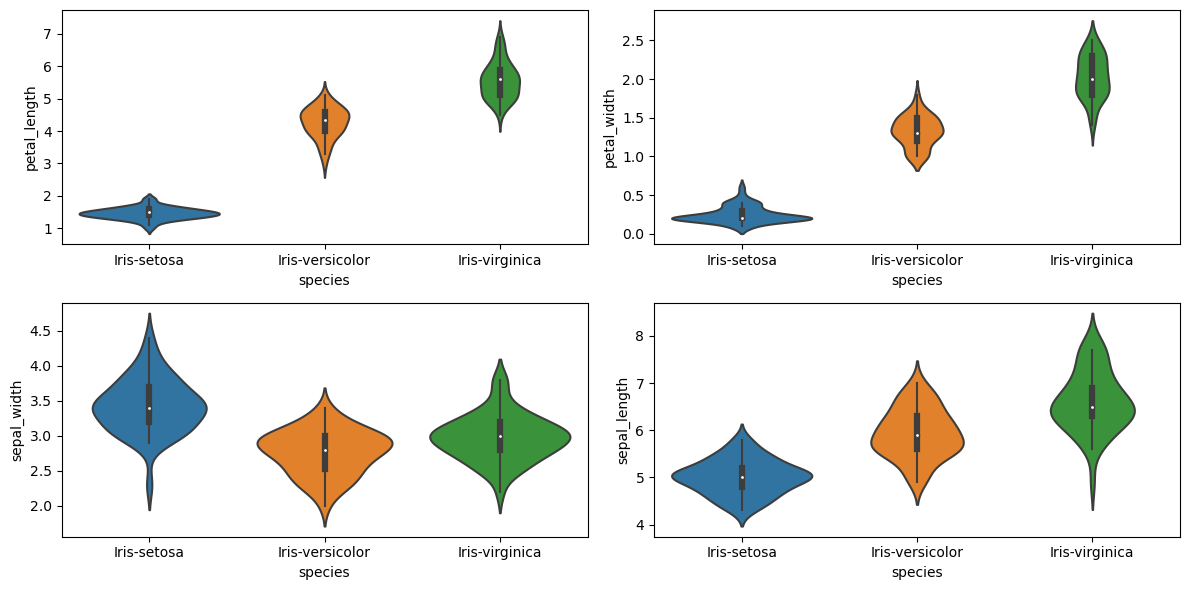

In [32]:
# Violin plot to visualize distribution and density by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sn.violinplot(x="species", y="petal_length", data=df)
plt.subplot(2, 2, 2)
sn.violinplot(x="species", y="petal_width", data=df)
plt.subplot(2, 2, 3)
sn.violinplot(x="species", y="sepal_width", data=df)
plt.subplot(2, 2, 4)
sn.violinplot(x="species", y="sepal_length", data=df)
plt.tight_layout()

In [33]:
x = df.drop('species',axis=1)
y = df['species']

In [34]:
#Target variable 
# Applying mapping
encoder = LabelEncoder()
y = df["species"]
y = encoder.fit_transform(y)

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'Iris-setosa' is labeled as 0
Class 'Iris-versicolor' is labeled as 1
Class 'Iris-virginica' is labeled as 2


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((117, 4), (30, 4), (117,), (30,))

## Logistic Regression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [43]:
y_test

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [45]:
accuracy_score(y_test,pred)

0.9333333333333333

In [46]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [48]:
probability = model.predict_proba(x_test)[:,1]

In [49]:
probability

array([0.41279539, 0.93162255, 0.02690042, 0.02063745, 0.56516914,
       0.02870638, 0.81265142, 0.04335993, 0.36006766, 0.03492526,
       0.03582074, 0.70313093, 0.28224169, 0.94644911, 0.02362025,
       0.80327291, 0.05607936, 0.94862663, 0.4851539 , 0.03934031,
       0.03202557, 0.02054391, 0.01587405, 0.02953632, 0.79819512,
       0.00537783, 0.77891674, 0.013453  , 0.75835487, 0.02852776])

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [52]:
y_train

array([2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 0, 1, 2])

In [53]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
pred = dt.predict(x_test)
pred

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [55]:
y_test

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [56]:
accuracy_score(y_test,pred)

0.9666666666666667

In [57]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [59]:
probab = dt.predict_proba(x_test)[:,1]
probab

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.6\ngini = 0.666\nsamples = 117\nvalue = [37, 40, 40]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.85\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.7\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.133\nsamples = 42\nvalue = [0, 3, 39]'),
 Text(0.7, 0.4166666666666667, 'x[0] <= 6.15\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'x[3] <= 1.75\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.7, 0.083333333333333

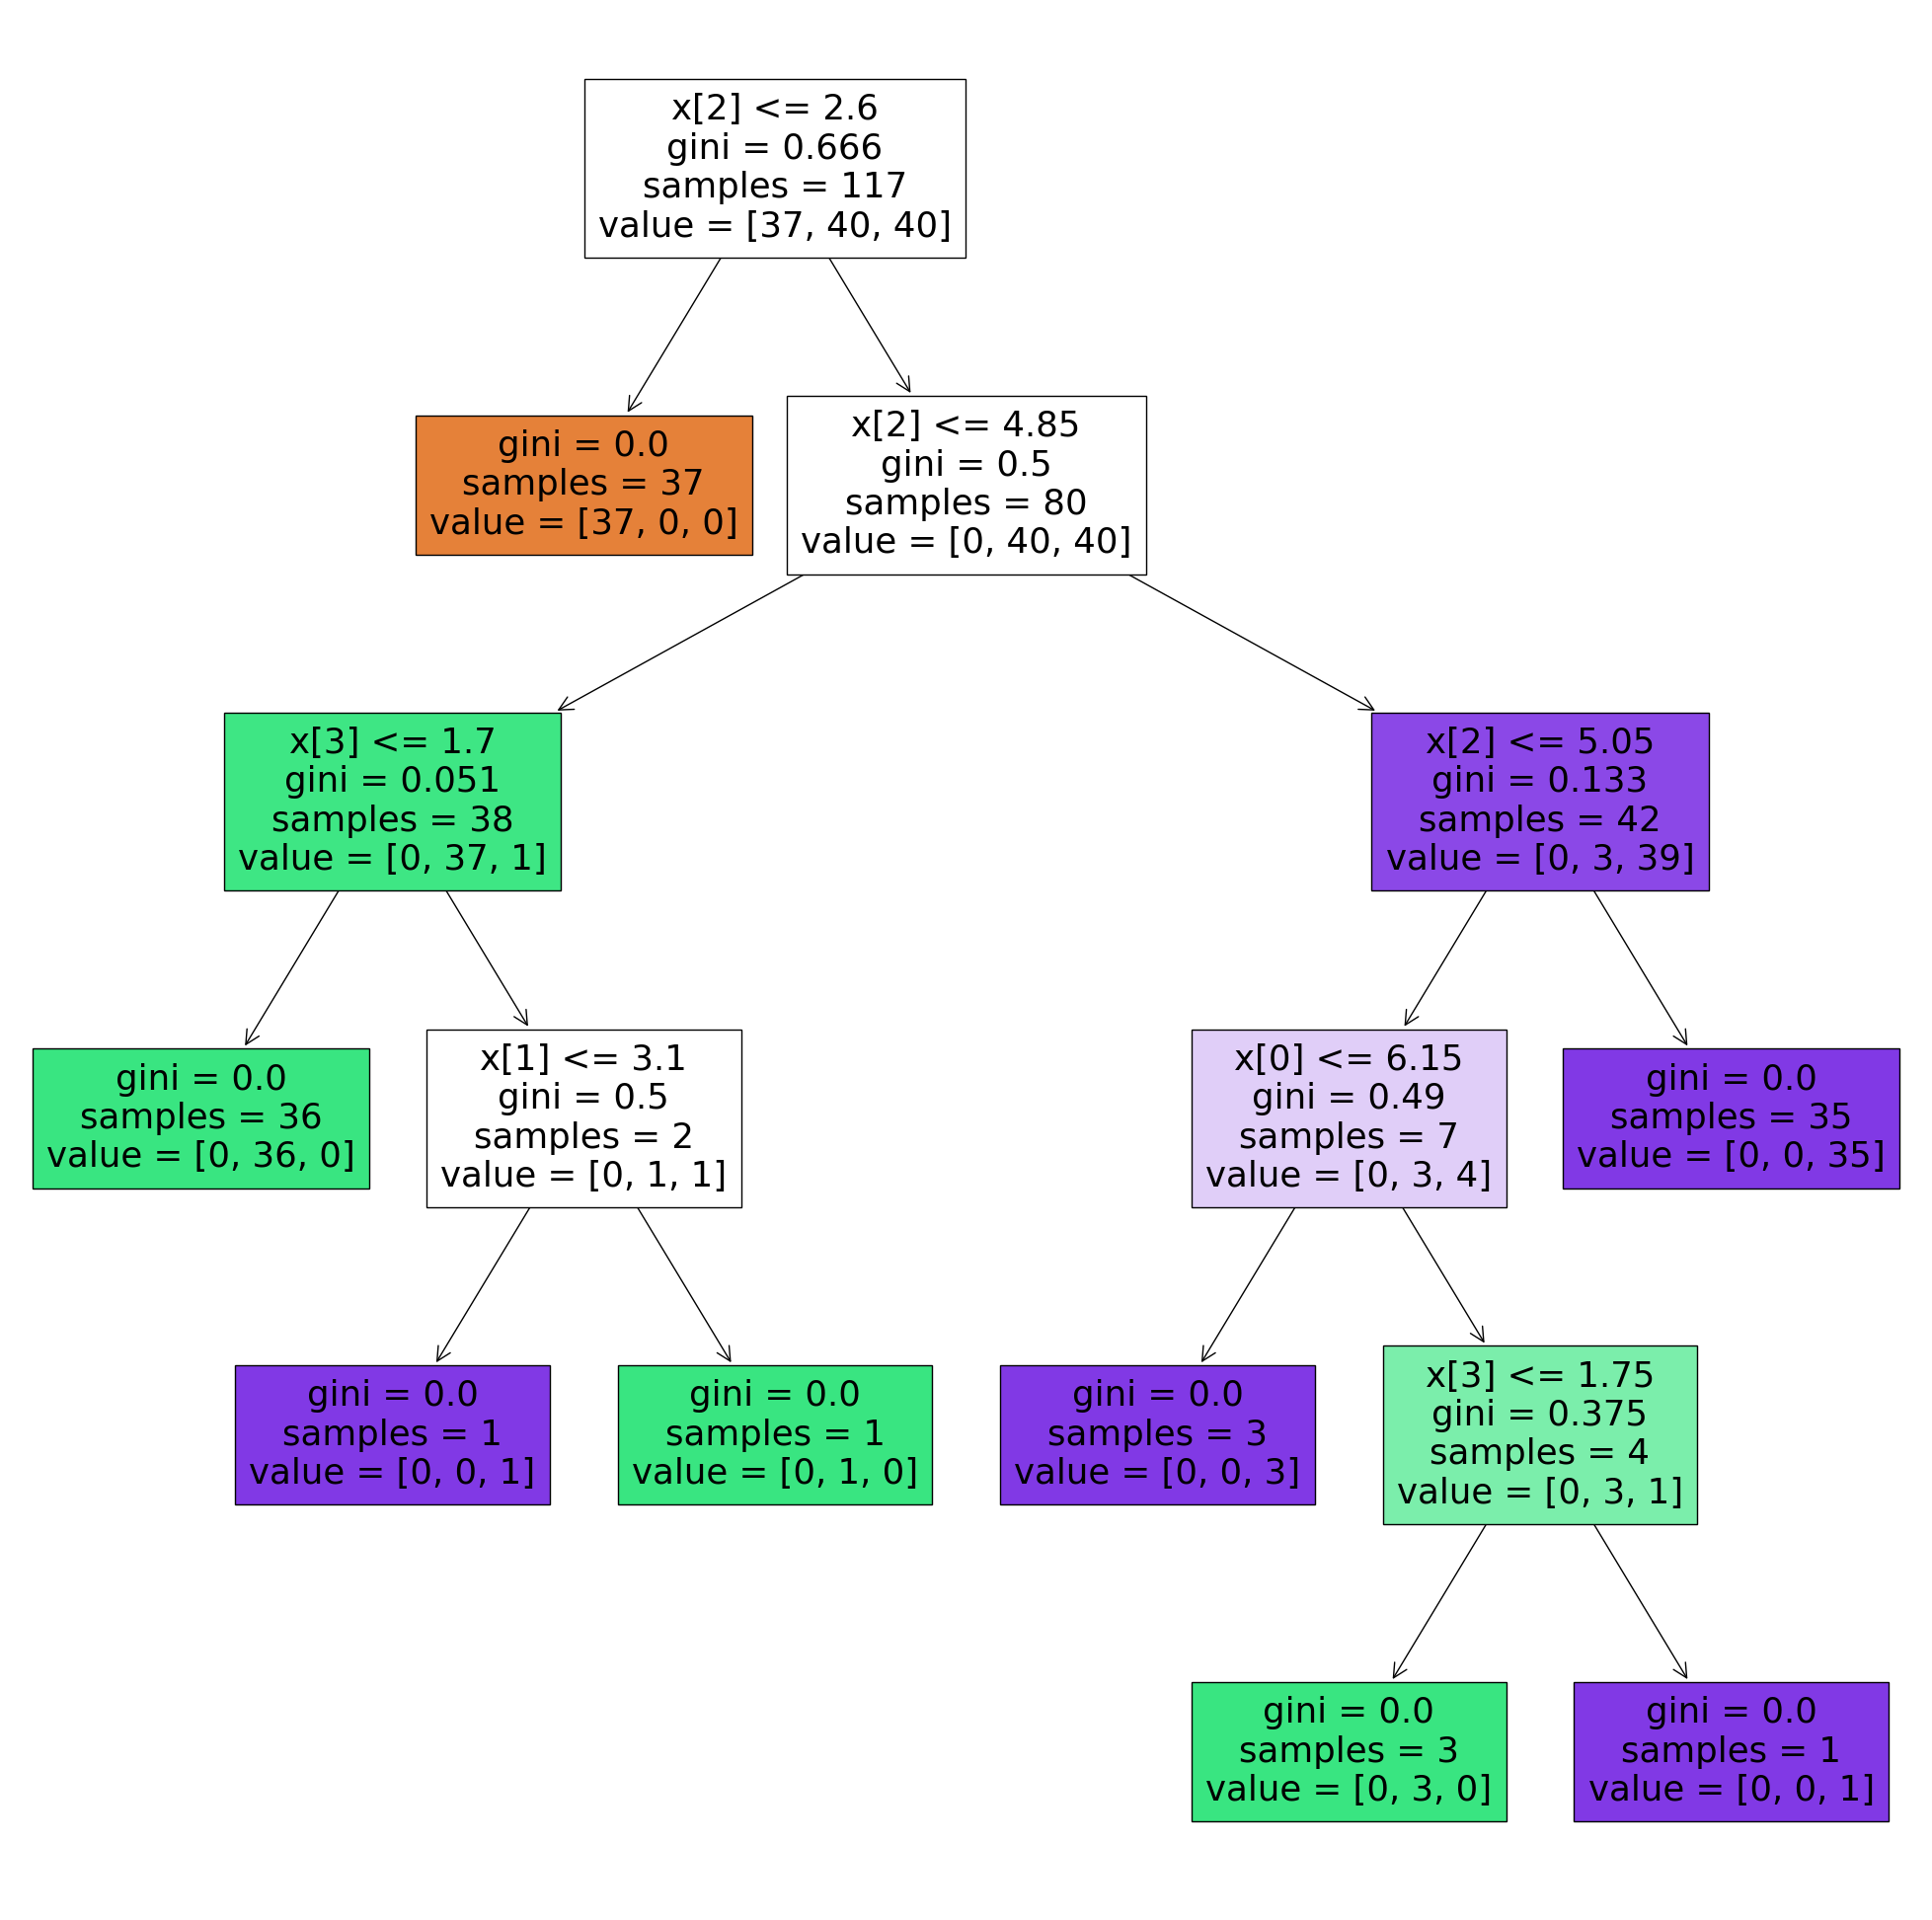

In [60]:
from sklearn import tree
plt.figure(figsize = (25,25))
tree.plot_tree(dt,filled= True)

## Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
clf = GaussianNB()

In [76]:
clf.fit(x_train, y_train)

GaussianNB()

In [77]:
clf.score(x_test,y_test)

0.9666666666666667

In [78]:
clf.score(x_train,y_train)

0.9658119658119658

In [79]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [82]:
forest_params = [{'max_depth':list(range(10,15)),'max_features': list(range(0,14))}]

In [83]:
rf_cv = GridSearchCV(rf,param_grid = forest_params,cv = 10,scoring="accuracy")
rf_cv.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [84]:
pred = rf_cv.predict(x_test)

In [85]:
accuracy_score(y_test,pred)

0.9333333333333333

In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [87]:
rf_cv.best_params_

{'max_depth': 10, 'max_features': 1}

In [88]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
probabo = rf.predict_proba(x_test)[:,1]
probabo

array([0.13, 1.  , 0.  , 0.  , 0.9 , 0.  , 0.96, 0.  , 0.21, 0.  , 0.  ,
       0.99, 0.11, 1.  , 0.  , 0.91, 0.02, 1.  , 0.35, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.99, 0.  , 0.98, 0.  , 0.94, 0.  ])

Testing Performances for Machine Learning Algorithms


<Axes: xlabel='Algorithms'>

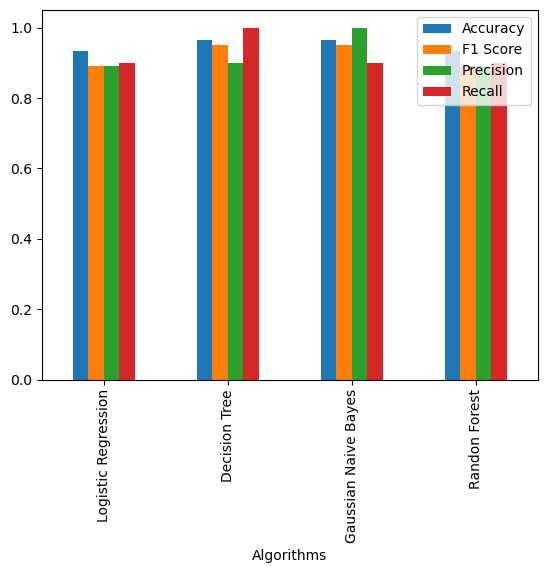

In [92]:
# Results
print("Testing Performances for Machine Learning Algorithms")
result = pd.DataFrame({"Algorithms":['Logistic Regression', "Decision Tree","Gaussian Naive Bayes","Random Forest"],
                       "Accuracy":[0.933,  0.966, 0.965, 0.933],
                       "Precision":[0.89,  0.90,  1.00, 0.89],
                       "Recall":[0.90,  1.00,  0.90, 0.90],
                       "F1 Score":[0.89,  0.95,  0.95, 0.89]})
result.plot(x="Algorithms" , y=["Accuracy", "F1 Score", "Precision", "Recall"], kind = "bar")